
# Training und Test eines Support Vector Classifiers mit scikit-learn für Profifußballer

In [269]:
#PANDAS FÜR TRANSFORMATION DER DATEN
import pandas as pd
import numpy as np
import time as t
#IMPORT UND LÖSCHEN DES AUTOMATISCH NEU ANGELEGTEN INDEX'
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv').drop('Unnamed: 0', axis=1)
player_info = pd.read_csv('player_info.csv', encoding = "ISO-8859-1")
X = X.drop('Unnamed: 0', axis=1)

X.join(player_info, how='left')




,height_cm,weight_kg,overall,pac,sho,pas,dri,def,phy,crossing,...,penalties,composure,marking,standing_tackle,Unnamed: 0,index,full_name,club,age,league
0,185.0,80.0,94,90,93,82,90,33,80,85,...,85,95,22,31,0,0,C. Ronaldo dos Santos Aveiro,Real Madrid CF,32,Spanish Primera División
1,170.0,72.0,93,89,90,86,96,26,61,77,...,78,96,13,28,1,1,Lionel Messi,FC Barcelona,30,Spanish Primera División
2,175.0,68.0,92,92,84,79,95,30,60,75,...,81,92,21,24,2,2,Neymar da Silva Santos Jr.,Paris Saint-Germain,25,French Ligue 1
3,182.0,86.0,92,82,90,79,87,42,81,77,...,85,83,30,45,3,3,Luis Suárez,FC Barcelona,30,Spanish Primera División
4,193.0,92.0,92,91,90,95,89,60,91,15,...,47,70,10,10,4,4,Manuel Neuer,FC Bayern Munich,31,German Bundesliga
5,185.0,79.0,91,81,88,75,86,38,82,62,...,84,87,25,42,5,5,Robert Lewandowski,FC Bayern Munich,28,German Bundesliga
6,193.0,76.0,90,90,85,87,90,58,86,17,...,40,64,13,21,6,6,David De Gea Quintana,Manchester United,26,English Premier League
7,173.0,76.0,90,90,82,84,92,32,66,80,...,86,87,25,27,7,7,Eden Hazard,Chelsea,26,English Premier League
8,182.0,78.0,90,56,81,89,81,73,70,85,...,73,85,63,82,8,8,Toni Kroos,Real Madrid CF,27,Spanish Primera División
9,184.0,87.0,90,79,87,70,83,25,74,68,...,70,86,12,22,9,9,Gonzalo Higuaín,Juventus,29,Italian Serie A


In [270]:
col_names = list(X.columns.values)

X.describe()

,height_cm,weight_kg,overall,pac,sho,pas,dri,def,phy,crossing,...,jumping,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle
count,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,...,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000
mean,181.271980,75.400856,66.253029,67.739969,53.485217,57.531177,62.591308,49.404301,64.767033,49.806046,...,64.885351,47.238691,55.828109,46.575247,49.681060,53.030788,48.989163,57.886684,44.124986,47.478937
std,6.690392,6.994824,6.946729,10.937646,13.833779,10.466810,10.377375,17.120189,9.657583,18.436764,...,11.878768,19.267705,17.455601,20.684196,19.413951,14.358107,15.802867,12.905050,21.582512,21.819514
min,155.000000,49.000000,46.000000,21.000000,14.000000,24.000000,24.000000,12.000000,27.000000,5.000000,...,13.000000,3.000000,11.000000,4.000000,2.000000,10.000000,5.000000,5.000000,4.000000,4.000000
25%,177.000000,70.000000,62.000000,61.000000,44.000000,51.000000,57.000000,34.000000,58.000000,38.000000,...,58.000000,33.000000,43.000000,26.000000,38.000000,43.000000,39.000000,51.000000,22.000000,26.000000
50%,181.000000,75.000000,66.000000,68.000000,56.000000,58.000000,64.000000,52.000000,66.000000,54.000000,...,66.000000,51.000000,59.000000,52.000000,55.000000,55.000000,50.000000,60.000000,48.000000,54.000000
75%,186.000000,80.000000,71.000000,75.000000,64.000000,65.000000,70.000000,64.000000,72.000000,64.000000,...,73.000000,63.000000,69.000000,64.000000,64.000000,64.000000,61.000000,67.000000,63.000000,66.000000
max,205.000000,110.000000,94.000000,96.000000,93.000000,95.000000,96.000000,90.000000,92.000000,90.000000,...,95.000000,92.000000,96.000000,92.000000,95.000000,94.000000,92.000000,96.000000,92.000000,92.000000


## Standardisieren der Daten
Um das Training von verschiedenen Wertebereichen der Features unabhängig zu machen, standardisieren wir jede Spalte (z.B. "height_cm" aus [150,210] und "dri" aus [0.3,1.0] -> das Feature "height_cm" wird stärker gewichtet).<br><br>
Sei $C$ eine Spalte der Länge $n$, dann kann man die Werte in der Spalte als Ausgang eines $n$-fach wiederholten Zufallsexperiments auffassen. Sei $X$ diejenige Zufallsvariable, die die einfache Ausführung des Zufallsexperiments beschreibt.<br>

Wir standardisieren nun alle $x\in C$ durch:<br>
$ x_{std}=\frac{x - \mathbb{E}(X)}{\sqrt{Var(X)}}$
<br>

Beim Standardisieren handelt es sich um einen Isomorphismus, und<br>
$X\sim\sigma(a,b) \Rightarrow X_{std}  \sim\sigma(0,1)$


In [271]:
#SKALIEREN DER DATEN

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_X = sc_X.fit(X)

X = sc_X.transform(X)

X = pd.DataFrame(X)
X.columns=col_names

X.describe()








,height_cm,weight_kg,overall,pac,sho,pas,dri,def,phy,crossing,...,jumping,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle
count,1.799400e+04,1.799400e+04,1.799400e+04,1.799400e+04,1.799400e+04,1.799400e+04,1.799400e+04,1.799400e+04,1.799400e+04,1.799400e+04,...,1.799400e+04,1.799400e+04,1.799400e+04,1.799400e+04,1.799400e+04,1.799400e+04,1.799400e+04,1.799400e+04,1.799400e+04,1.799400e+04
mean,-1.227506e-15,-1.774635e-15,-1.379118e-13,3.577406e-15,-6.445587e-15,1.218582e-14,-1.563162e-14,-2.736625e-15,-8.367842e-15,2.965876e-15,...,-1.739081e-15,1.536814e-16,-4.398697e-15,-7.484535e-16,-3.740071e-15,1.014095e-15,-1.547673e-16,6.615767e-15,-3.485813e-15,1.795007e-15
std,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,...,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00
min,-3.926931e+00,-3.774447e+00,-2.915558e+00,-4.273430e+00,-2.854340e+00,-3.203661e+00,-3.718896e+00,-2.184867e+00,-3.910718e+00,-2.430323e+00,...,-4.368028e+00,-2.296066e+00,-2.568193e+00,-2.058404e+00,-2.456089e+00,-2.997051e+00,-2.783696e+00,-4.098253e+00,-1.859195e+00,-1.992718e+00
25%,-6.385423e-01,-7.721432e-01,-6.122518e-01,-6.162346e-01,-6.856753e-01,-6.240066e-01,-5.388129e-01,-8.997991e-01,-7.007159e-01,-6.403713e-01,...,-5.796512e-01,-7.390131e-01,-7.349197e-01,-9.947604e-01,-6.017005e-01,-6.986344e-01,-6.321284e-01,-5.336574e-01,-1.025163e+00,-9.844186e-01
50%,-4.065339e-02,-5.730909e-02,-3.642518e-02,2.377462e-02,1.817907e-01,4.479263e-02,1.357502e-01,1.516205e-01,1.276718e-01,2.274841e-01,...,9.383804e-02,1.952186e-01,1.817170e-01,2.622729e-01,2.739827e-01,1.371536e-01,6.396719e-02,1.637634e-01,1.795491e-01,2.988721e-01
75%,7.067077e-01,6.575250e-01,6.833581e-01,6.637839e-01,7.601014e-01,7.135919e-01,7.139472e-01,8.525668e-01,7.489625e-01,7.698937e-01,...,6.831411e-01,8.180397e-01,7.546149e-01,8.424421e-01,7.375798e-01,7.639947e-01,7.600628e-01,7.062017e-01,8.745756e-01,8.488538e-01
max,3.546680e+00,4.946530e+00,3.994361e+00,2.583812e+00,2.856478e+00,3.579874e+00,3.219467e+00,2.371284e+00,2.819932e+00,2.180159e+00,...,2.535237e+00,2.323191e+00,2.301439e+00,2.196170e+00,2.334414e+00,2.853465e+00,2.721787e+00,2.953446e+00,2.218293e+00,2.040481e+00


In [299]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1)

In [300]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', C=10)
start = t.time()
svc = svc.fit(X_train,y_train)
end = t.time()
print('Das Training hat',end-start,'Sekunden gedauert.')
y_pred = svc.predict(X_test)
print('Precision in sample :{}% \n Precision in test: {}%'.format(100*svc.score(X_train,y_train),100*svc.score(X_test,y_test)))

C:\Users\MartinDammrath\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Das Training hat 9.802731990814209 Sekunden gedauert.
Precision in sample :96.12819562801037% 
 Precision in test: 92.55555555555556%


In [274]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Mittelfeld       0.83      0.82      0.83       419
       Sturm       0.92      0.93      0.92       571
     Torwart       1.00      1.00      1.00       194
Verteidigung       0.95      0.95      0.95       616

 avg / total       0.92      0.92      0.92      1800



In [1]:
#Reduziere Feature-Anzahl auf 3 (statt 36).
X.to_csv('DataFürPaul.csv')
#X_train_modif = X_train_modif.join(y_train)
from sklearn.decomposition import PCA
pca = PCA(n_components= 3)
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca, index=X.index, columns=['PC1','PC2','PC3'])

#VERSCHLECHTERT PERFORMANCE, WARUM?: Scale X_pca
#sc_X = StandardScaler().fit(X_pca)
#X_pca = sc_X.transform(X_pca)

X_pca_train,X_pca_test,y_pca_train,y_pca_test = train_test_split(X_pca,y, test_size=0.1)

svc_pca = SVC(kernel='rbf', C=10)
start = t.time()
svc_pca = svc_pca.fit(X_pca_train,y_pca_train)
end = t.time()
y_pred_pca = svc_pca.predict(X_pca_test)
print('Das Training hat',end-start,'Sekunden gedauert.')
print('Precision in sample :{}% \n Precision in test: {}%'.format(100*svc_pca.score(X_pca_train,y_pca_train),100*svc_pca.score(X_pca_test,y_pca_test)))






NameError: name 'X' is not defined

In [276]:
print(classification_report(y_pca_test, y_pred_pca))

              precision    recall  f1-score   support

  Mittelfeld       0.68      0.50      0.57       419
       Sturm       0.84      0.89      0.86       598
     Torwart       1.00      1.00      1.00       197
Verteidigung       0.83      0.93      0.88       586

 avg / total       0.82      0.83      0.82      1800



In [277]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=4)
k_means = k_means.fit(X_pca)
y_k_means = k_means.predict(X_pca)
y_k_means = pd.DataFrame(y_k_means, columns=['k_means_result'], index=X_pca.index) 
y_k_means
y_test_1 = y.join(y_k_means, how='left')
y_test_1.groupby(['Position','k_means_result']).size()



Position      k_means_result
Mittelfeld    0                 1107
              2                  663
              3                 2366
Sturm         0                 3482
              1                    3
              2                   81
              3                 2277
Torwart       1                 2021
Verteidigung  0                  303
              1                    2
              2                 4267
              3                 1422
dtype: int64

In [278]:
k_means_stats = pd.DataFrame(k_means.predict(X_pca), index=X_pca.index, columns=['k-means Cluster Number'])
def join_cluster_center(x):
    return k_means.cluster_centers_[x]
k_means_stats['Cluster Center'] = k_means_stats['k-means Cluster Number'].apply(join_cluster_center)
k_means_stats = k_means_stats.join(y,how='left')
k_means_stats = k_means_stats.join(X_pca, how='left')
k_means_stats_0=k_means_stats.where(k_means_stats['k-means Cluster Number']==0).dropna()
k_means_stats_0=np.array(k_means_stats_0[['PC1','PC2','PC3']])
k_means_stats_1=k_means_stats.where(k_means_stats['k-means Cluster Number']==1).dropna()
k_means_stats_1=np.array(k_means_stats_1[['PC1','PC2','PC3']])
k_means_stats_2=k_means_stats.where(k_means_stats['k-means Cluster Number']==2).dropna()
k_means_stats_2=np.array(k_means_stats_2[['PC1','PC2','PC3']])
k_means_stats_3=k_means_stats.where(k_means_stats['k-means Cluster Number']==3).dropna()
k_means_stats_3=np.array(k_means_stats_3[['PC1','PC2','PC3']])
#PCA_Datapoints = np.array(k_means_stats[['PC1','PC2','PC3']])
#k_means_stats['PCA Datapoints']=PCA_Datapoints.tolist()
#k_means_stats
#x_dp, y_dp, z_dp = PCA_Datapoints.T
k_means_stats

#def calc_dist(x):
    


,k-means Cluster Number,Cluster Center,Position,PC1,PC2,PC3
0,3,"[-3.69135600897, 0.274415977054, 0.890235371374]",Sturm,-10.095852,-1.894058,5.539270
1,3,"[-3.69135600897, 0.274415977054, 0.890235371374]",Sturm,-10.643740,-4.259971,3.726931
2,3,"[-3.69135600897, 0.274415977054, 0.890235371374]",Sturm,-9.460508,-3.888015,2.915658
3,3,"[-3.69135600897, 0.274415977054, 0.890235371374]",Sturm,-9.034861,-1.103689,5.391504
4,1,"[8.17142934436, -1.92708527453, 2.38365561223]",Torwart,2.701774,-0.699508,7.936001
5,3,"[-3.69135600897, 0.274415977054, 0.890235371374]",Sturm,-8.721517,-0.994041,4.762926
6,1,"[8.17142934436, -1.92708527453, 2.38365561223]",Torwart,2.796645,-1.028414,6.526489
7,3,"[-3.69135600897, 0.274415977054, 0.890235371374]",Sturm,-9.356940,-3.411701,3.070152
8,3,"[-3.69135600897, 0.274415977054, 0.890235371374]",Mittelfeld,-8.030161,1.415553,4.693369
9,3,"[-3.69135600897, 0.274415977054, 0.890235371374]",Sturm,-6.926319,-2.513413,4.894180


In [279]:
# Classifier using K-Means Results:
# Train on X_pca_train w/o 'Torwart'
#X_pca_new = X_pca.where(X_pca.index == y.where(y['Position']!='Torwart').index)
y_new = y.where(y['Position']!='Torwart').dropna()
y_new_index = y_new.index.tolist()
X_pca_new = X_pca.iloc[y_new_index,:]

X_new_train,X_new_test, y_new_train, y_new_test = train_test_split(X_pca_new,y_new, test_size=0.1)

svc_2 = SVC(kernel='rbf')
svc_2 = svc_2.fit(X_new_train,y_new_train)
y_pred_new = svc_2.predict(X_new_test)
print('Precision in sample :{}% \n Precision in test: {}%'.format(100*svc_pca.score(X_pca_train,y_pca_train),100*svc_pca.score(X_pca_test,y_pca_test)))




C:\Users\MartinDammrath\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Precision in sample :83.40125972582439% 
 Precision in test: 82.55555555555556%


In [280]:
print(classification_report(y_new_test, y_pred_new))

              precision    recall  f1-score   support

  Mittelfeld       0.64      0.49      0.56       415
       Sturm       0.83      0.90      0.87       586
Verteidigung       0.83      0.90      0.86       597

 avg / total       0.78      0.79      0.78      1598



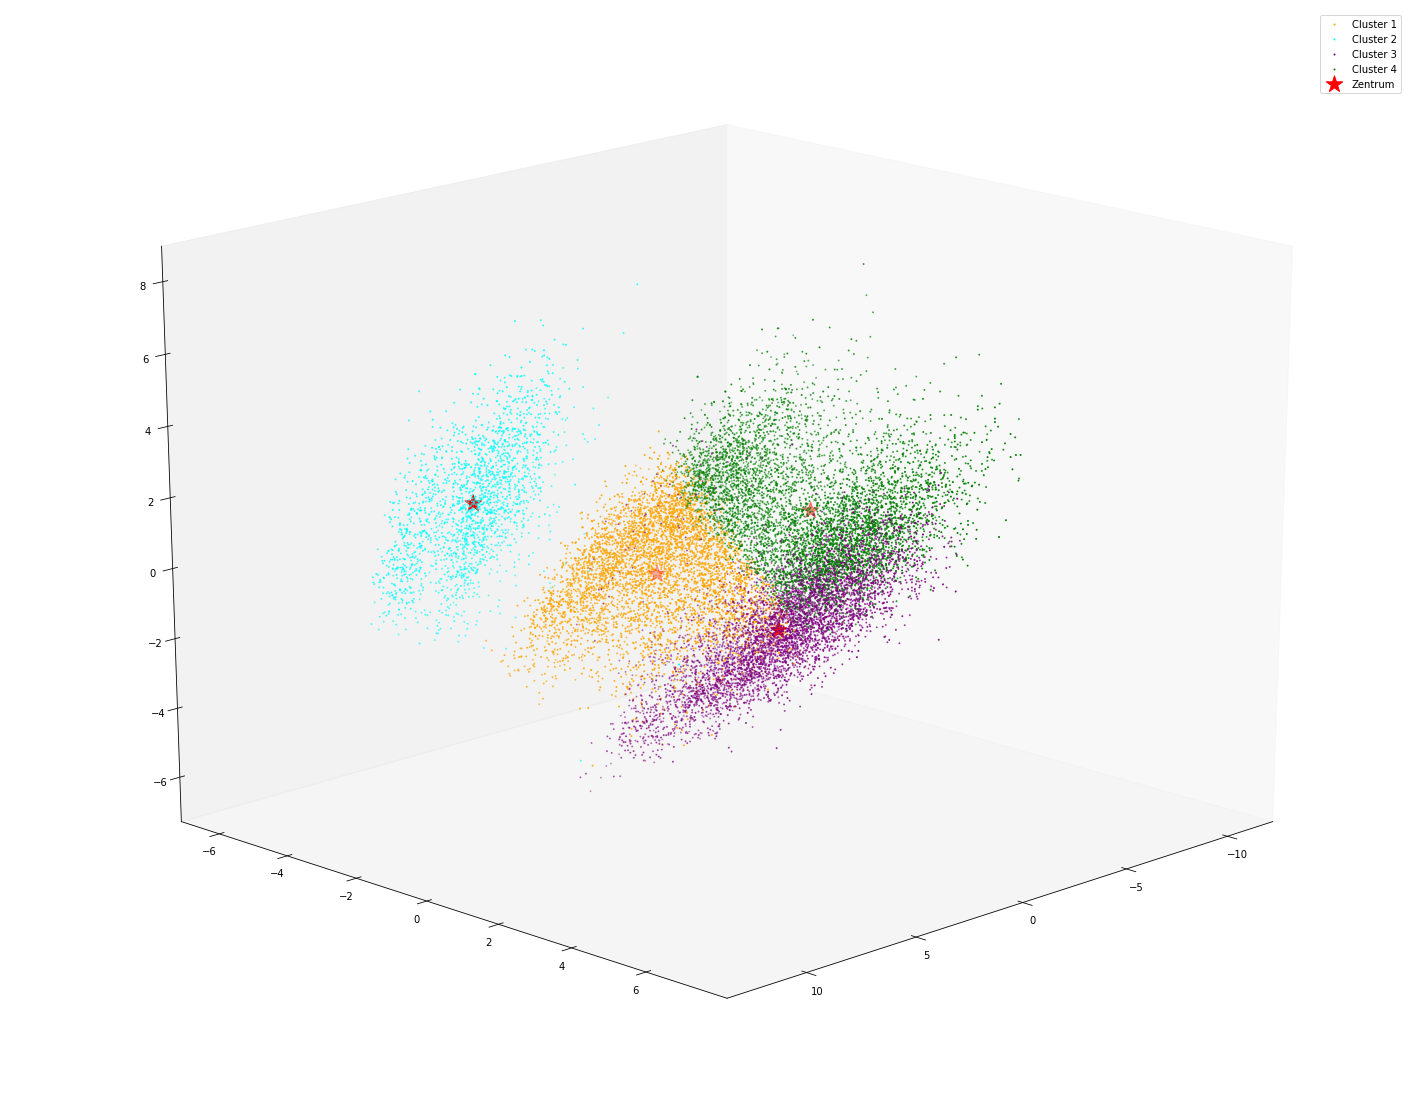

In [281]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize=(25,20))
ax = fig.gca(projection='3d')
#ax = fig.add_subplot(1, 1, 1, axisbg="white")
ax.scatter(k_means_stats_0[:,0], k_means_stats_0[:,1], k_means_stats_0[:,2],color='orange', label='Cluster 1',s=1)
ax.scatter(k_means_stats_1[:,0], k_means_stats_1[:,1], k_means_stats_1[:,2],color='cyan', label='Cluster 2',s=1)
ax.scatter(k_means_stats_2[:,0], k_means_stats_2[:,1], k_means_stats_2[:,2],color='purple', label='Cluster 3',s=1)
ax.scatter(k_means_stats_3[:,0], k_means_stats_3[:,1], k_means_stats_3[:,2],color='green', label='Cluster 4',s=1)
ax.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], k_means.cluster_centers_[:,2],color='red',marker='*',s=300, label='Zentrum')
ax.legend()
ax.grid(False)
ax.view_init(20, 45)
plt.savefig("KMeans.jpg",dpi=500)

plt.show()



In [282]:
# for angle in range(0, 360):
#     ax.view_init(30, angle)
#     plt.draw()
#     plt.pause(.001)

In [283]:
# Achtung, faulerweise überschrieb 

# y_pred = svc.predict(X)
# y_pred = pd.DataFrame(y_pred)
# y_pred = pd.DataFrame(y_pred.values, index=y.index,columns=['Prediction'])
# y_pred_vs_test = y_pred.join(y, how="left")
# y_pred_vs_test = y_pred_vs_test.join(player_info, how='left')
# y_pred_vs_test = y_pred_vs_test.where(y_pred_vs_test['Prediction'] != y_pred_vs_test['Position'])
# y_pred_vs_test.dropna(inplace=True)
# y_pred_vs_test = y_pred_vs_test.drop(['index','Unnamed: 0'], axis=1)
# y_pred_vs_test = y_pred_vs_test.join(X['overall'])
# y_pred_vs_test.loc[y_pred_vs_test['league'] == 'German Bundesliga']

#missmatch_count = y_pred_vs_test.groupby(['club']).size().reset_index(name='counts')
#missmatch_count


In [284]:
# from sklearn.cluster import KMeans
# k_means = KMeans(n_clusters=4, random_state=0)
# k_means = k_means.fit(X_train)
# means_pos = pd.DataFrame(k_means.predict(X_train)).reindex(index=X_train.index).join(y_train)
# means_pos

In [285]:
# X_pca[:,0].tolist()
# X_pca = pd.DataFrame(X_pca, columns=['PC1','PC2']).reindex(index=X_train_modif.index)
# X_pca = X_pca.join(y, how='right')
# from matplotlib import pyplot as plt
# # plt.clf()
# # plt.plot(X_pca.iloc[:,0],X_pca.iloc[:,1], 'bo ')
# # plt.show()

# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
# targets = ['Torwart','Verteidigung','Mittelfeld','Sturm']
# colors = ['r', 'g', 'b','m']
# for target, color in zip(targets,colors):
#     indicesToKeep = X_pca['Position'] == target
#     ax.scatter(X_pca.loc[indicesToKeep, 'PC1']
#                , X_pca.loc[indicesToKeep, 'PC2']
#                , c = color
#                , s = 50)
# ax.legend(targets)
# ax.grid()
# plt.show()

In [286]:
# ind_of_no_match = []
# import numpy as np
# y_test_array = np.array(y_test)

# for i in range(0,len(y_pred)):
#     if not y_pred[i]==y_test_array[i,0]:
#         ind_of_no_match.append(i)
        
# ind_of_no_match
# player_info = pd.read_csv('player_info.csv', encoding = "ISO-8859-1")
# missmatches = []
# for i in ind_of_no_match:
#     missmatches.append([player_info.iloc[i,2],y_test_array[i,0],y_pred[i]])

# missmatches = pd.DataFrame(missmatches, columns=['Player_Name','Real_Pos','Predicted_Pos'])
# missmatches



In [287]:
# X_missmatched = []
# for i in ind_of_no_match:
#     X_missmatched.append(X.iloc[i,:])
# X_missmatched = pd.DataFrame(X_missmatched)
# X_missmatched

In [288]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=3)
# pca_components = pca.fit_transform(X_train)
# principalDf = pd.DataFrame(data = pca_components, columns = ['principal component 1', 'principal component 2','principal component 3'])

# finalDf = pd.concat([principalDf, y], axis = 1)

# finalDf

In [289]:
# from matplotlib import pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(111, projection='3d')
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_zlabel('Principal Component 3', fontsize = 15)
# ax.set_title('3 component PCA', fontsize = 20)
# targets = ['Verteidigung','Sturm','Torwart','Mittelfeld']
# colors = ['r', 'g', 'b', 'm']
# for target, color in zip(targets,colors):
#     indicesToKeep = finalDf['Position'] == target
#     ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
#                , finalDf.loc[indicesToKeep, 'principal component 2']
#                , finalDf.loc[indicesToKeep, 'principal component 3']
#                , c = color
#                , s = 50)
# ax.legend(targets)
# ax.grid()



# ax.view_init(azim=250, elev=20)
# fig

In [290]:
# ax.view_init(azim=180, elev=20)
# fig